<a href="https://colab.research.google.com/github/Awonke03/Bagels-Game/blob/master/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd
import numpy as np
dt=pd.read_csv("/content/drive/MyDrive/Datasets/movielens_100k.csv")
dt.head()

,movie_id,title,year,directors,actors,genres
0,1,toy story,1995,John Lasseter,Tom Hanks Tim Allen Don Rickles Jim Varney Wal...,Animation Adventure Comedy Family Fantasy
1,2,goldeneye,1995,Martin Campbell,Pierce Brosnan Sean Bean Izabella Scorupco Fam...,Action Adventure Thriller
2,3,four rooms,1995,Allison Anders Alexandre Rockwell Robert Rodri...,Sammi Davis Amanda De Cadenet Valeria Golino M...,Comedy
3,4,get shorty,1995,Barry Sonnenfeld,John Travolta Gene Hackman Rene Russo Danny De...,Comedy Crime Thriller
4,5,copycat,1995,Jon Amiel,Sigourney Weaver Holly Hunter Dermot Mulroney ...,Drama Mystery Thriller


In [ ]:
dt.columns

Index(['movie_id', 'title', 'year', 'directors', 'actors', 'genres'], dtype='object')

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movie_id   1681 non-null   int64 
 1   title      1681 non-null   object
 2   year       1681 non-null   int64 
 3   directors  1555 non-null   object
 4   actors     1555 non-null   object
 5   genres     1561 non-null   object
dtypes: int64(2), object(4)
memory usage: 78.9+ KB


In [ ]:
!pip install dash-html-components dash-core-components


In [ ]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 11.8 MB/s eta 0:00:00


In [107]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel



# Preprocess data for recommendation engine
dt['year'] = dt['year'].fillna('')
dt['directors'] = dt['directors'].fillna('')
dt['actors'] = dt['actors'].fillna('')
dt['genres'] = dt['genres'].fillna('')
dt['combined_features'] = dt['year'].astype(str) + ' ' + dt['directors'] + ' ' + dt['actors'] + ' ' + dt['genres']

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dt['combined_features'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


fig1 = px.scatter(dt.explode('genres'), x='directors', y='genres', title="Relationship between Directors and Genres")
fig1.update_layout(
    xaxis_title="Director",
    yaxis_title="Genre",
    height=800,
    width=1350,
)

# Visualization 2: Number of Movies in Each Genre
fig2 = px.bar(dt['genres'].str.split(expand=True).stack().reset_index(name='Genre'), x='Genre', title="Number of Movies in Each Genre")
fig2.update_layout(xaxis_title="Genre", yaxis_title="Number of Movies", height=800, width=1350)

# Visualization 3: Top Directors with the Most Movies
fig3 = px.bar(dt['directors'].value_counts().reset_index(), x='index', y='directors', title="Top Directors with the Most Movies")
fig3.update_layout(xaxis_title="Director", yaxis_title="Number of Movies", height=800, width=1350)

years_count = dt.year.value_counts().sort_index()
df = pd.DataFrame({'Year': years_count.index, 'Count': years_count.values})
# Visualization 4: Yearly Counts
fig4 = px.line(df, x='Year', y='Count', markers=True, title='Yearly Counts',
              labels={'Count': 'Number of Occurrences', 'Year': 'Year'})
fig4.update_layout(height=800, width=1350)

# Create Dash app
app = dash.Dash(__name__, suppress_callback_exceptions=True)

dt.dropna(inplace=True)

# Visualization 5: Sunburst chart
fig5 = px.sunburst(dt, path=['year', 'genres', 'title'])
fig5.update_layout(title_text="Genres and Movies by Year", height=800, width=1350)

# Default layout
default_layout = html.Div([
    html.H1("Movie Recommendations", style={'text-align': 'center'}),

    dcc.Input(id='movie-input', type='text', placeholder='Enter a movie title', style={'width': '50%', 'margin': '10px'}),
    html.Button(id='submit-button', n_clicks=0, children='Get Recommendations', style={'margin': '10px'}),

    html.Div(id='recommendations-output', style={'margin': '20px'})
])

# Define app layout
app.layout = html.Div(children=[
    html.Div(
        className='menu',
        children=[
            html.Button('Search and Recommendations', id='btn-0', n_clicks=0, style={'backgroundColor': 'darkgrey', 'border-radius': '12px', 'margin-bottom': '10px'}),
            html.Button('Directors and Genres', id='btn-1', n_clicks=0, style={'backgroundColor': 'darkgrey', 'border-radius': '12px', 'margin-bottom': '10px'}),
            html.Button('Number of Movies in Each Genre', id='btn-2', n_clicks=0, style={'backgroundColor': 'darkgrey', 'border-radius': '12px', 'margin-bottom': '10px'}),
            html.Button('Top Directors with the Most Movies', id='btn-3', n_clicks=0, style={'backgroundColor': 'darkgrey', 'border-radius': '12px', 'margin-bottom': '10px'}),
            html.Button('Yearly Counts', id='btn-4', n_clicks=0, style={'backgroundColor': 'darkgrey', 'border-radius': '12px', 'margin-bottom': '10px'}),
            html.Button('Sunburst Chart', id='btn-5', n_clicks=0, style={'backgroundColor': 'darkgrey', 'border-radius': '12px', 'margin-bottom': '10px'}),
        ]
    ),

    html.Div(id='page-content', style={'backgroundColor': 'darkgrey', 'padding': '20px'}),
])

# Callback to update page content based on button clicks
@app.callback(Output('page-content', 'children'),
              [Input('btn-0', 'n_clicks'),
               Input('btn-1', 'n_clicks'),
               Input('btn-2', 'n_clicks'),
               Input('btn-3', 'n_clicks'),
               Input('btn-4', 'n_clicks'),
               Input('btn-5', 'n_clicks')])
def display_page(btn0, btn1, btn2, btn3, btn4, btn5):
    ctx = dash.callback_context
    button_id = ctx.triggered_id.split('.')[0] if ctx.triggered_id else 'btn-0'

    if button_id == 'btn-0':
        return default_layout
    elif button_id == 'btn-1':
        return dcc.Graph(figure=fig1)
    elif button_id == 'btn-2':
        return dcc.Graph(figure=fig2)
    elif button_id == 'btn-3':
        return dcc.Graph(figure=fig3)
    elif button_id == 'btn-4':
        return dcc.Graph(figure=fig4)
    elif button_id == 'btn-5':
        return dcc.Graph(figure=fig5)
    else:
        return default_layout

# Callback to handle button click and display recommendations
@app.callback(Output('recommendations-output', 'children'),
              [Input('submit-button', 'n_clicks')],
              [State('movie-input', 'value')])
def get_recommendations(n_clicks, movie_title):
    if n_clicks > 0 and movie_title:
        if movie_title not in dt['title'].values:
            return f"Movie with title '{movie_title}' not found in the dataset."

        idx = dt[dt['title'] == movie_title].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]
        recommended_movies = dt['title'].iloc[movie_indices]

        return html.Ul([html.Li(movie) for movie in recommended_movies])

    return ""

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8050)


<IPython.core.display.Javascript object>

In [104]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming 'dt' is your DataFrame

# Preprocess data
dt['year'] = dt['year'].fillna('')
dt['directors'] = dt['directors'].fillna('')
dt['actors'] = dt['actors'].fillna('')
dt['genres'] = dt['genres'].fillna('')
dt['combined_features'] = dt['year'].astype(str) + ' ' + dt['directors'] + ' ' + dt['actors'] + ' ' + dt['genres']

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(dt['combined_features'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div(children=[
    html.H1("Movie Recommendation Engine", style={'text-align': 'center'}),

    dcc.Input(id='movie-input', type='text', placeholder='Enter a movie title', style={'width': '50%', 'margin': '10px'}),
    html.Button(id='submit-button', n_clicks=0, children='Get Recommendations', style={'margin': '10px'}),

    html.Div(id='recommendations-output', style={'margin': '20px'})
])

# Callback to handle button click and display recommendations
@app.callback(Output('recommendations-output', 'children'),
              [Input('submit-button', 'n_clicks')],
              [dash.dependencies.State('movie-input', 'value')])
def get_recommendations(n_clicks, movie_title):
    if n_clicks > 0 and movie_title:
        if movie_title not in dt['title'].values:
            return f"Movie with title '{movie_title}' not found in the dataset."

        idx = dt[dt['title'] == movie_title].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        movie_indices = [i[0] for i in sim_scores]
        recommendations = dt['title'].iloc[movie_indices].tolist()
        return html.Div([html.P(f"Recommended Movies for '{movie_title}':"),
                         html.Ul([html.Li(movie) for movie in recommendations])])

# Run the server if this script is the main module
if __name__ == '__main__':
    app.run_server(debug=True, host='127.0.0.1', port=8050)



<IPython.core.display.Javascript object>

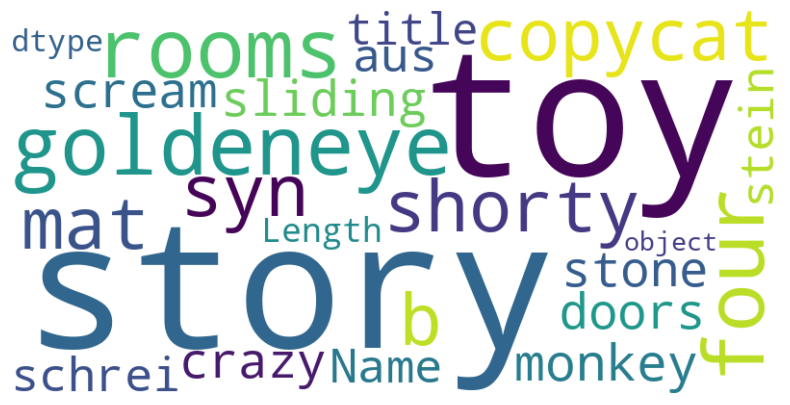

In [ ]:
len(dt.directors.unique())

1000

In [ ]:
len(dt.title.unique())

1658

In [ ]:
y=dt["title"]
X=dt.drop(columns="title")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


749              tomorrow never dies
1037                          hamlet
189                          henry v
180               return of the jedi
340      man who knew too little the
1606                           buddy
347                        hard rain
1287                  jack and sarah
545     young poisoners handbook the
69       four weddings and a funeral
Name: title, dtype: object


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

dt['combined_features'] = dt['year'].astype(str) + ' ' + dt['directors'] + ' ' + dt['actors'] + ' ' + dt['genres']

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(dt['combined_features'])

knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(tfidf_matrix)

movie_index = dt[dt['title'] == 'goldeneye'].index[0]
distances, indices = knn_model.kneighbors(tfidf_matrix[movie_index])

similar_movies = dt['title'].iloc[indices.flatten()].tolist()
similar_movies



['goldeneye',
 'tomorrow never dies',
 'hamlet',
 'henry v',
 'return of the jedi',
 'man who knew too little the',
 'buddy',
 'hard rain',
 'jack and sarah',
 'young poisoners handbook the']